In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import ast
import os

In [2]:
filename = "demoVar8P_simulation_10000rounds_20181202223700.csv"

In [4]:
df_var = pd.read_csv(filename)

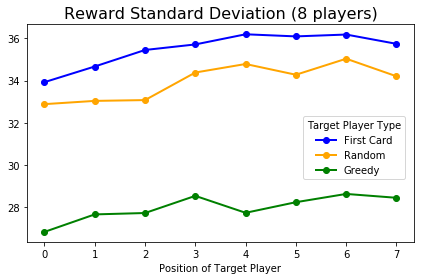

In [34]:
graph_folder = "local_graphs"

n_players = 8
vars_greedy = np.zeros(n_players)
vars_fc = np.zeros(n_players)
vars_random = np.zeros(n_players)

for i, row in df_var.iterrows():
    ptype = row["player_type"]
    ppos = row["pos"]
    pvar = row["var"]
    if ptype == "PC_FIRST_CARD":
        vars_fc[ppos] = pvar
    elif ptype == "PC_GREEDY":
        vars_greedy[ppos] = pvar
    elif ptype == "PC_RANDOM":
        vars_random[ppos] = pvar

plt.plot(vars_fc, color='b', marker='o', lw=2, label="First Card")
plt.plot(vars_random, color='orange', marker='o', lw=2, label="Random")
plt.plot(vars_greedy, color='g', marker='o', lw=2, label="Greedy")

# plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Position of Target Player")
plt.legend(loc="upper right", title="Target Player Type", bbox_to_anchor=(.99, .6))
plt.title("Reward Standard Deviation ({} players)".format(n_players), fontsize=16)
plt.tight_layout()

plt.savefig(os.path.join(graph_folder, "4_player_std_8p_demo1.pdf"))
plt.show()